# URl based phishing detection

# Problem Statement
The project aims to create a model that can accurately identify and classify URLs as either legitimate or malicious/phishing. The model will analyze the characteristics and patterns of URLs to determine their potential threat level.

# Data Collection

Collected a diverse and representative dataset of URLs, including both legitimate and phishing URLs. This dataset will serve as the foundation for training and evaluating the machine learning model.

https://drive.google.com/file/d/1VDSGbK78fOyeyThIN0pN_O6pmNo3UnSJ/view?usp=sharing

# Feature Extraction
Extracting relevant features from the URLs that can help differentiate between legitimate and phishing URLs. These features may include domain information, subdomain count, presence of suspicious keywords, URL length, and other indicators of malicious intent.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
#loading data
ds=pd.read_csv("dataset_website.csv")

In [2]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Data Visualization

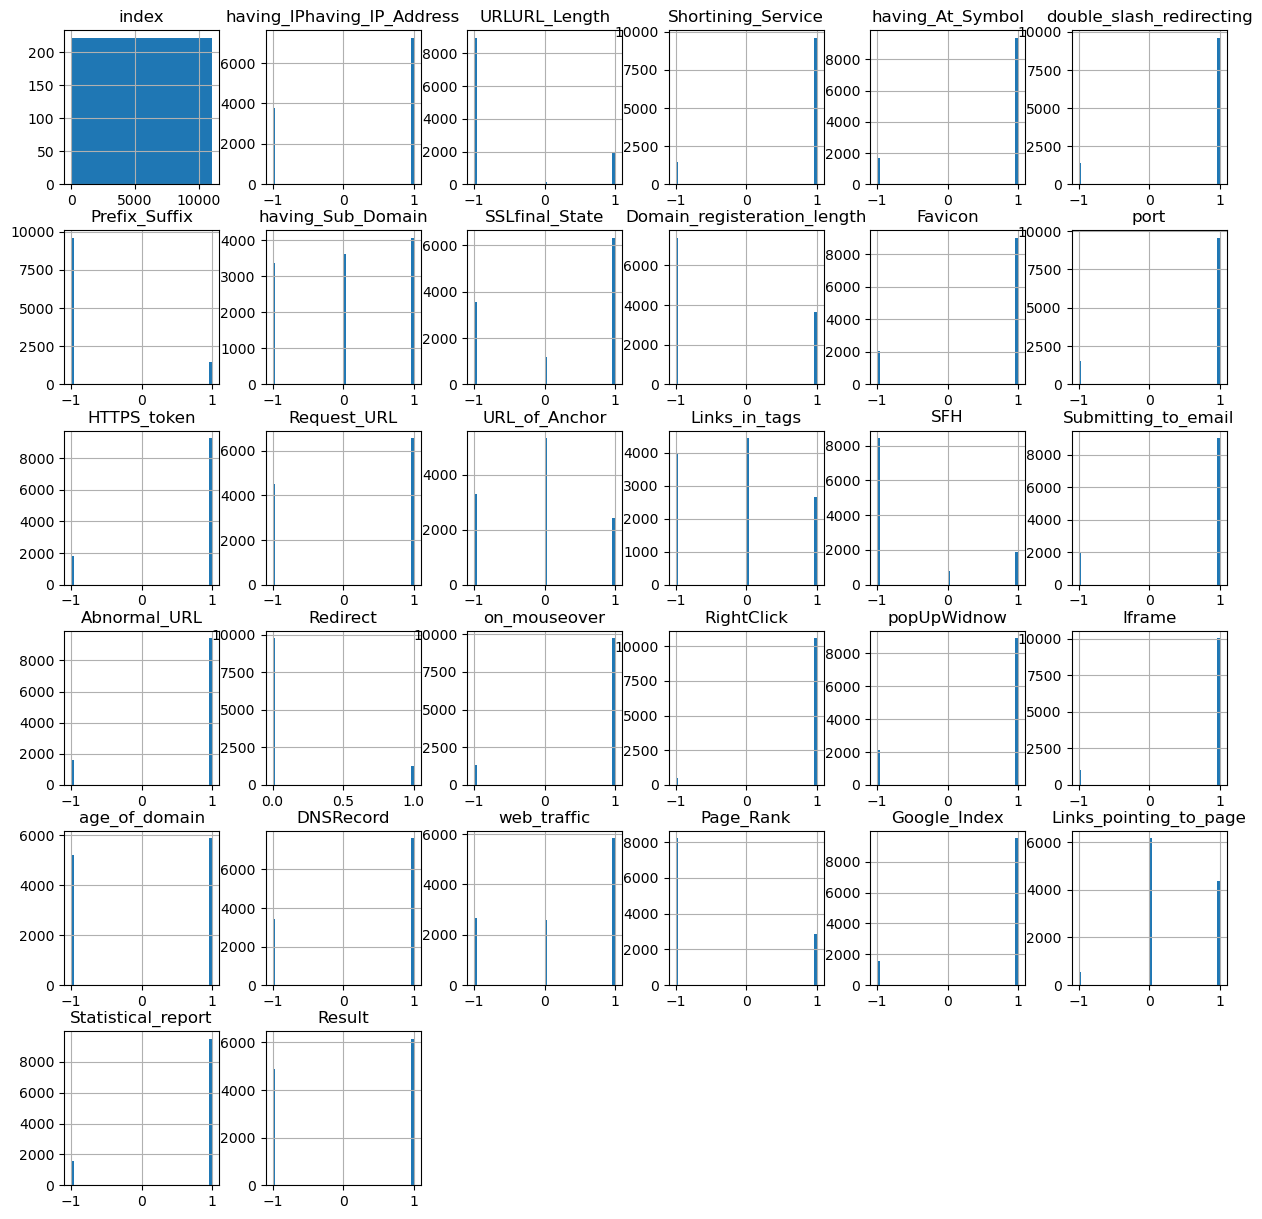

In [3]:
#Plotting the data distribution
ds.hist(bins = 50,figsize = (15,15))
plt.show()

# Heat Map

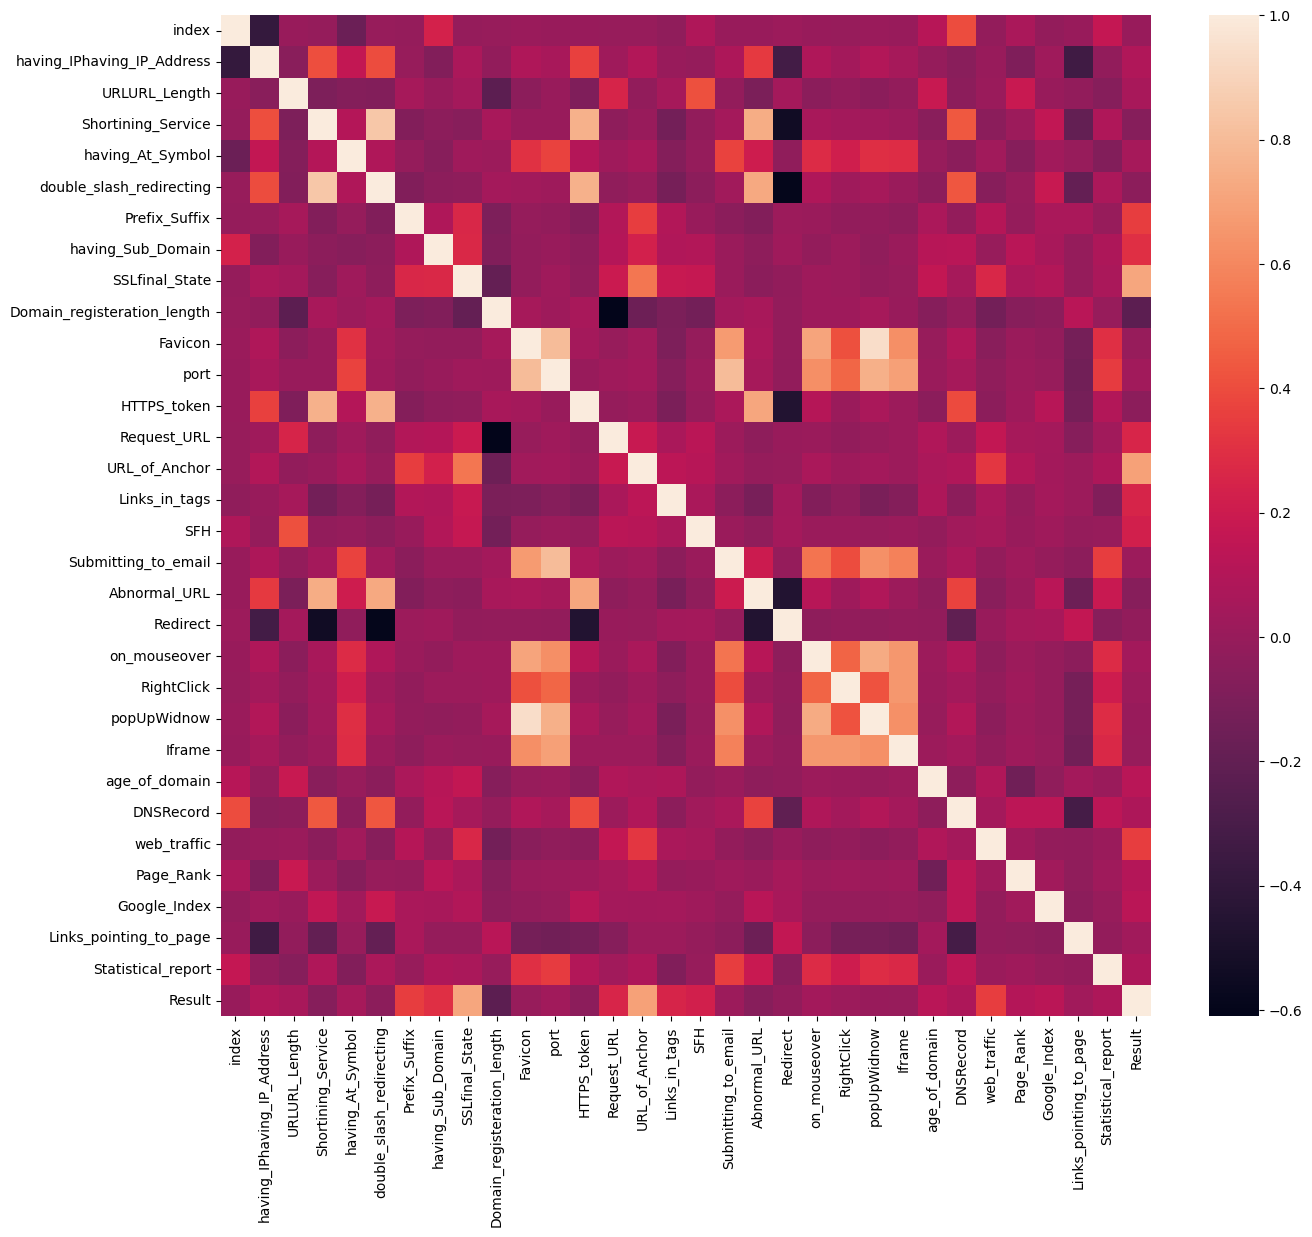

In [4]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(ds.corr())
plt.show()

# Data Preprocessing & EDA

In [5]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Handling Missing Values

In [6]:
ds.info()
ds.isnull().any() #handling null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

# Splitting Data

In [7]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


# Using Appropriate Model

# Train, Test, Split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Decison Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def DS_model(x_train,x_test,y_train,y_test):
    tree=DecisionTreeClassifier()
    ds=tree.fit(x_train,y_train)
    predict_tree=ds.predict(x_test)
    training_accuracy=ds.score(x_train,y_train)
    testing_accuracy=ds.score(x_test,y_test)
    print("*** DecisionTreeClassifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_tree))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_tree))
    print("** Classification Report **")
    print(classification_report(y_test,predict_tree))
DS_model(x_train,x_test,y_train,y_test)

*** DecisionTreeClassifier ***
Training Accuracy :  0.9902758932609679
Testing Accuracy :  0.9629127091813658
Accuracy Score :  0.9629127091813658
** Confusion Matrix **
[[ 962   52]
 [  30 1167]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.97      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# XGBoost

In [10]:
import numpy as np

# Assuming y_train has classes [-1, 1]
# Convert them to [0, 1]
y_train_mapped = np.where(y_train == -1, 0, 1)

In [11]:
from xgboost import XGBClassifier
import numpy as np

def XGB_model(x_train, x_test, y_train, y_test):
    # Convert the classes in y_train to [0, 1] format
    y_train_mapped = np.where(y_train == -1, 0, 1)
    
    xgb = XGBClassifier()
    XGB = xgb.fit(x_train, y_train_mapped)
    predict_xgb = XGB.predict(x_test)
    training_accuracy = XGB.score(x_train, y_train_mapped)
    testing_accuracy = XGB.score(x_test, y_test)
    
    print("** Training Accuracy **")
    print(training_accuracy)
    print("\n** Testing Accuracy **")
    print(testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_xgb))
    print("\n** Classification Report **")
    print(classification_report(y_test, predict_xgb))

# Call the function with your data
XGB_model(x_train, x_test, y_train, y_test)

** Training Accuracy **
0.9862053369516056

** Testing Accuracy **
0.5305291723202171
Accuracy Score :  0.5305291723202171

** Classification Report **
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1014
           0       0.00      0.00      0.00         0
           1       0.96      0.98      0.97      1197

    accuracy                           0.53      2211
   macro avg       0.32      0.33      0.32      2211
weighted avg       0.52      0.53      0.52      2211



C:\Users\pagolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pagolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pagolu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pagolu\anaconda3\lib\site-packages\sklearn\metrics\

# SVM CLassifier

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def SVM_model(x_train,x_test,y_train,y_test):
    svm=SVC()
    SVM=svm.fit(x_train,y_train)
    predict_svm=SVM.predict(x_test)
    training_accuracy=SVM.score(x_train,y_train)
    testing_accuracy=SVM.score(x_test,y_test)
    print("*** SVMClassifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_svm))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_svm))
    print("** Classification Report **")
    print(classification_report(y_test,predict_svm))
SVM_model(x_train,x_test,y_train,y_test)

*** SVMClassifier ***
Training Accuracy :  0.9536408864767074
Testing Accuracy :  0.9407507914970602
Accuracy Score :  0.9407507914970602
** Confusion Matrix **
[[ 933   81]
 [  50 1147]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def LGR_model(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    LGR=lr.fit(x_train,y_train)
    predict_lr=LGR.predict(x_test)
    training_accuracy=LGR.score(x_train,y_train)
    testing_accuracy=LGR.score(x_test,y_test)
    print("*** Logistic Regresssion Classifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_lr))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_lr))
    print("** Classification Report **")
    print(classification_report(y_test,predict_lr))
LGR_model(x_train,x_test,y_train,y_test)

*** Logistic Regresssion Classifier ***
Training Accuracy :  0.9319312528267752
Testing Accuracy :  0.9167797376752601
Accuracy Score :  0.9167797376752601
** Confusion Matrix **
[[ 905  109]
 [  75 1122]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1014
           1       0.91      0.94      0.92      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.92      2211
weighted avg       0.92      0.92      0.92      2211



# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def KNN_model(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    KNN=knn.fit(x_train,y_train)
    predict_knn=KNN.predict(x_test)
    training_accuracy=KNN.score(x_train,y_train)
    testing_accuracy=KNN.score(x_test,y_test)
    print("*** KNeighborsClassifier ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_knn))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_knn))
    print("** Classification Report **")
    print(classification_report(y_test,predict_knn))
KNN_model(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.965513342379014
Testing Accuracy :  0.9434644957033017
Accuracy Score :  0.9434644957033017
** Confusion Matrix **
[[ 933   81]
 [  44 1153]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()
def Random_Forest(x_train,x_test,y_train,y_test):
    rdf=RandomForestClassifier()
    random=rdf.fit(x_train,y_train)
    predict_random=random.predict(x_test)
    training_accuracy=random.score(x_train,y_train)
    testing_accuracy=random.score(x_test,y_test)
    print(" Random Forest ")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_test, predict_random))
Random_Forest(x_train,x_test,y_train,y_test)

 Random Forest 
Training Accuracy :  0.9902758932609679
Testing Accuracy :  0.9687924016282226
Accuracy Score :  0.9687924016282226
** Confusion Matrix **
[[ 962   52]
 [  17 1180]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1014
           1       0.96      0.99      0.97      1197

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
def Naive_Bayes(x_train,x_test,y_train,y_test):
    gnb=GaussianNB()
    naive=gnb.fit(x_train,y_train)
    predict_naive=naive.predict(x_test)
    training_accuracy=naive.score(x_train,y_train)
    testing_accuracy=naive.score(x_test,y_test)
    print("*** Naive Bayes ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_naive))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_naive))
    print("** Classification Report **")
    print(classification_report(y_test, predict_naive))
Naive_Bayes(x_train,x_test,y_train,y_test)

*** Naive Bayes ***
Training Accuracy :  0.6037991858887382
Testing Accuracy :  0.6151062867480778
Accuracy Score :  0.6151062867480778
** Confusion Matrix **
[[1014    0]
 [ 851  346]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.54      1.00      0.70      1014
           1       1.00      0.29      0.45      1197

    accuracy                           0.62      2211
   macro avg       0.77      0.64      0.58      2211
weighted avg       0.79      0.62      0.57      2211



# Evaluation and Comparision

In [17]:
def comparison(x_train,x_test,y_train,y_test):
    KNN_model(x_train,x_test,y_train,y_test)
    print('='*100)
    Random_Forest(x_train,x_test,y_train,y_test)
    print('='*100)
    Naive_Bayes(x_train,x_test,y_train,y_test)
    print('='*100)
    LGR_model(x_train,x_test,y_train,y_test)
    print('='*100)
    DS_model(x_train,x_test,y_train,y_test)
    print('='*100)
    SVM_model(x_train,x_test,y_train,y_test)
    print('='*100)
comparison(x_train,x_test,y_train,y_test)

*** KNeighborsClassifier ***
Training Accuracy :  0.965513342379014
Testing Accuracy :  0.9434644957033017
Accuracy Score :  0.9434644957033017
** Confusion Matrix **
[[ 933   81]
 [  44 1153]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.95      0.92      0.94      1014
           1       0.93      0.96      0.95      1197

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211

 Random Forest 
Training Accuracy :  0.9902758932609679
Testing Accuracy :  0.9692446856625961
Accuracy Score :  0.9692446856625961
** Confusion Matrix **
[[ 962   52]
 [  16 1181]]
** Classification Report **
              precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1014
           1       0.96      0.99      0.97      1197

    accuracy                           0.97      2211
   macro avg       0.97

# Saving the Appropriate Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()
random=rdf.fit(x_train,y_train)
predict_random=random.predict(x_test)
training_accuracy=random.score(x_train,y_train)
testing_accuracy=random.score(x_test,y_test)
print(" Random Forest ")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, predict_random))

 Random Forest 
Training Accuracy :  0.9902758932609679
Testing Accuracy :  0.9696969696969697
Accuracy Score :  0.9696969696969697


In [19]:
import pickle
pickle.dump(rdf,open('Phishing_Website.pkl','wb'))

In [21]:
import pickle

# Load the model from the pickle file
with open('Phishing_Website.pkl', 'rb') as file:
    model = pickle.load(file)

In [22]:
attributes_and_methods = dir(model)

# Print the attributes and methods
for item in attributes_and_methods:
    print(item)

__abstractmethods__
__annotations__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_abc_impl
_check_feature_names
_check_n_features
_compute_oob_predictions
_estimator
_estimator_type
_get_oob_predictions
_get_param_names
_get_tags
_make_estimator
_more_tags
_parameter_constraints
_repr_html_
_repr_html_inner
_repr_mimebundle_
_required_parameters
_set_oob_score_and_attributes
_validate_X_predict
_validate_data
_validate_estimator
_validate_params
_validate_y_class_weight
apply
base_estimator
base_estimator_
bootstrap
ccp_alpha
class_weight
classes_
criterion
decision_path
estimator
estimator_
estimator_params
estimators_
feature_importances_
fit
get_params
max_depth
max_features
max_leaf_nodes
max_samples
min_impuri